# CMPE403 Data Science & Analytics
# Chapter 2: Data Science

* In data science and machine learning, we often deal with numerical (mathematical) operations such as: linear algebra, calculus, etc.
* Python is a scripting langauage, not very efficient at numerical computations
* Numpy is fast is scientific computation library
* Numpy offers fast N-dimentional arrays and many math and linear algebra functions 
* Nearly all data science/machine learning libraries use it underneath
    * Ex: Pandas, scikit-learn

In [1]:
# Uncomment below to install numpy
#!pip install numpy

In [2]:
import numpy as np

### Numpy arrays
* **ndarray:** N-dimentional arrays (N is any positive integer)
* Can be initialized with Python data structures

In [3]:
# initialize using 1D tuple
arr = np.array((1, 2, 3, 6, 1, 17, 1))
# ndarray stands for N-dimentional array
type(arr)

numpy.ndarray

In [4]:
# initialize using 1D list
arr = np.array([1, 2, 3, 6, 1, 17, 1])
# ndarray stands for N-dimentional array
type(arr)

numpy.ndarray

In [5]:
print(f'Data type: {arr.dtype}')
print(f'Length of array: {len(arr)}')
print(f'Number of bytes: {arr.nbytes}')
print(f'Bytes per element: {arr.nbytes//len(arr)}')

Data type: int32
Length of array: 7
Number of bytes: 28
Bytes per element: 4


In [6]:
print(f'Number of dimensions: {arr.ndim}')
print(f'Shape of dimensions: {arr.shape}')

Number of dimensions: 1
Shape of dimensions: (7,)


#### Force data type

In [7]:
np.array([2, 3, 5], dtype=np.float32)

array([2., 3., 5.], dtype=float32)

#### Vectors

In [8]:
vector = np.array([1, 2, 3, 4])
vector

array([1, 2, 3, 4])

#### Matrix (2D arrays)
* (Remember this is the 2D list notation)

In [9]:
# A (3x3) matrix
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [10]:
print(f'Number of dimensions: {matrix.ndim}')
print(f'Shape of dimensions: {matrix.shape}')

Number of dimensions: 2
Shape of dimensions: (3, 3)


#### Broadcasting
* Highly recommended reading: https://numpy.org/doc/stable/user/basics.broadcasting.html
* Highly recommended watch: https://www.youtube.com/watch?v=oG1t3qlzq14

In [11]:
# 3 is stretched along all axis
matrix + 3

array([[ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [12]:
matrix * 3

array([[ 3,  6,  9],
       [12, 15, 18],
       [21, 24, 27]])

In [13]:
# Broadcasting is equalivent to this
matrix * np.array([[3, 3, 3], [3, 3, 3], [3, 3, 3]])

array([[ 3,  6,  9],
       [12, 15, 18],
       [21, 24, 27]])

### Why Vectors and Matrices are Important ? 
* They can represent your data and models
* Ex: vector can be considered as linear combination of featues
* Ex: matrices can represent multiple samples of a linear combination of featues
* Ex: vectors and matrices can be layers of a artificial neural network

#### Slicing works almost the same as Python built-ins

In [14]:
# indexes:      0  1  2  3  4   5  6
arr = np.array([1, 2, 3, 6, 1, 17, 1])

print('Elements starting from second:')
print(arr[1:])

print('Elements from second to fifth:')
print(arr[1:5])

print('Last element in the array:')
print(arr[-1])

print('From beginning to end but steps with 2:')
print(arr[::2])

print('Reversed:')
print(arr[::-1])

Elements starting from second:
[ 2  3  6  1 17  1]
Elements from second to fifth:
[2 3 6 1]
Last element in the array:
1
From beginning to end but steps with 2:
[1 3 1 1]
Reversed:
[ 1 17  1  6  3  2  1]


#### Multi-dim slicing
* **":"** operator selects all elements in that dim

In [15]:
test_array = np.array([
    [1.0, 2.0], 
    [3.0, 4.0]
])

 
print('All of first row, only first column:')
print(test_array[:, 0]) # : select all of first column

print('All of first row, only second column:')
print(test_array[:, 1]) # rows samples, select all samples of second column 

print('All of first column, only first row:')
print(test_array[0, :])

print('All of first column, only second row:')
print(test_array[1, :]) # selecting samples of all features

All of first row, only first column:
[1. 3.]
All of first row, only second column:
[2. 4.]
All of first column, only first row:
[1. 2.]
All of first column, only second row:
[3. 4.]


#### Mean (average) of the array

In [16]:
test_array = np.array([
    [1.0, 2.0], 
    [3.0, 4.0]
])

np.mean(test_array)

2.5

#### Column-wise mean

In [17]:
np.mean(test_array, axis=0)

array([2., 3.])

#### Row-wise mean

In [18]:
np.mean(test_array, axis=1)

array([1.5, 3.5])

#### Example: Mean Squarred Error

$$
MSE =  \frac{1}{N}\sum_{i=1}^{N}(y_i-\hat{y_i})^2
$$

* Used for evaluating machine learning models (measure of prediction error)
* $N$ is number of samples (n_samples)
* $y_i$ is the targets values (from dataset)
* $\hat{y_i}$ is the predicted values (from model)

In [19]:
# actual values from data
y = np.array([
    [1.0, 2.0], 
    [3.0, 4.0]
])

# our model's prediction
y_hat = np.array([
    [1.0, -1.0], 
    [0.3, 1.4]
])

#mse = np.mean((y - y_hat)**2)
mse = np.mean(np.square(y - y_hat))
print(f'MSE: {mse:.4}')

MSE: 5.763


## Why we need NumPy ? Faster!
* Most of the scientific computation libraries in Python use NumPy underneath to speed up computations
* Examples: pandas, scikit-learn, etc.

In [20]:
arr_random = np.random.rand(1000000)
# Measure the speed of plain Python
%timeit sum(arr_random)
# Measure the speed of Numpy
%timeit np.sum(arr_random)

71.4 ms ± 765 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
452 μs ± 18.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Data Frames with pandas
* DataFrame: 2D data
    * rows: number of samples
    * columns: number of features
* Series: 1D dataframe

In [21]:
# Uncomment below to install pandas
#!pip install pandas

In [22]:
import pandas as pd

#### Initialize Series

In [23]:
init_list = [0.56, 15.39, -36.32, 24.0]
 
# create series form a list
series = pd.Series(data=init_list)
series.head()

0     0.56
1    15.39
2   -36.32
3    24.00
dtype: float64

#### Initialize Dataframe with Python dict

In [24]:
init_data = {
    'Name': ['Kolby Vico', 'Jenna Hayden', 'Navy Keighley', 'Jane Derrick'],
    'Age': [51, 40, 35, 18],
    'Occupation': ['Developer', 'Data Scientist', 'Professor', 'Security Guard']
}
  
# Create DataFrame
df = pd.DataFrame(data=init_data)
df.head() # by default prints first 5 rows

,Name,Age,Occupation
0,Kolby Vico,51,Developer
1,Jenna Hayden,40,Data Scientist
2,Navy Keighley,35,Professor
3,Jane Derrick,18,Security Guard


### UCI Machine Learning Repositary, wine quality dataset
#### Link: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [25]:
df = pd.read_csv('winequality-red.csv', delimiter=';')
# Don't forget the delimiter, below is imcomplete
#df = pd.read_csv('winequality-red.csv')

# By default head() only shows first 5 rows
df.head()
#df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Summary of statistics

In [26]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Information about data types

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [28]:
list(df.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [29]:
df['fixed acidity']

0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1599, dtype: float64

#### Note that single column is actually a Series rather than Dataframe

In [30]:
type(df['fixed acidity'])

pandas.core.series.Series

#### Convert to Python list

In [31]:
# It is a long list, display only first 5 elements
df['fixed acidity'].to_list()[:5]

[7.4, 7.8, 7.8, 11.2, 7.4]

### Mutiple Column select

In [32]:
df_selected = df[['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'quality']]

# Alternatively you can do:
#columns = ['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'quality']
#df_selected = df[columns]

df_selected.head()

,fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,quality
0,7.4,1.9,11.0,34.0,5
1,7.8,2.6,25.0,67.0,5
2,7.8,2.3,15.0,54.0,5
3,11.2,1.9,17.0,60.0,6
4,7.4,1.9,11.0,34.0,5


#### Note that mutiple column select results in dataframe rather than series

In [33]:
type(df_selected)

pandas.core.frame.DataFrame

#### Convert to Numpy array

In [34]:
df.to_numpy()

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [35]:
df.values

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [36]:
# 2D, as expected
df.values.shape

(1599, 12)

## Data with missing values
#### NaN (not a number) values are missing data

In [37]:
df_missing = pd.read_csv('properity_data.csv')
df_missing.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3.0,1.0,1000
1,100002000,197.0,LEXINGTON,N,3.0,1.5,1200
2,100003000,205.0,LEXINGTON,N,NaN,1.0,850
3,100004000,201.0,BERKELEY,Y,1.0,NaN,700
4,100005000,203.0,BERKELEY,Y,3.0,2.0,1600
5,100006000,207.0,BERKELEY,Y,NaN,1.0,800
6,100007000,NaN,WASHINGTON,N,2.0,1.0,950
7,100008000,213.0,TREMONT,Y,1.0,1.0,1000
8,100009000,215.0,TREMONT,Y,NaN,2.0,1800


In [38]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           9 non-null      int64  
 1   ST_NUM        8 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  9 non-null      object 
 4   NUM_BEDROOMS  6 non-null      float64
 5   NUM_BATH      8 non-null      float64
 6   SQ_FT         9 non-null      int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 636.0+ bytes


In [39]:
# Check which rows are null in the column NUM_BEDROOMS
df_missing['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8     True
Name: NUM_BEDROOMS, dtype: bool

### Loop over columns

In [40]:
for column_name in df_missing.columns:
    # Calculate the mean
    missing = np.mean(df_missing[column_name].isnull())
    print(f'{column_name}, {round(missing*100)}% missing')

PID, 0% missing
ST_NUM, 11% missing
ST_NAME, 0% missing
OWN_OCCUPIED, 0% missing
NUM_BEDROOMS, 33% missing
NUM_BATH, 11% missing
SQ_FT, 0% missing


### Handling missing data

In [41]:
# Remove rows with missing data
df_missing.dropna()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3.0,1.0,1000
1,100002000,197.0,LEXINGTON,N,3.0,1.5,1200
4,100005000,203.0,BERKELEY,Y,3.0,2.0,1600
7,100008000,213.0,TREMONT,Y,1.0,1.0,1000


In [42]:
# Remove columns with missing data
# (axis 0 is rows, 1 is columns)
df_missing.dropna(axis=1)

,PID,ST_NAME,OWN_OCCUPIED,SQ_FT
0,100001000,PUTNAM,Y,1000
1,100002000,LEXINGTON,N,1200
2,100003000,LEXINGTON,N,850
3,100004000,BERKELEY,Y,700
4,100005000,BERKELEY,Y,1600
5,100006000,BERKELEY,Y,800
6,100007000,WASHINGTON,N,950
7,100008000,TREMONT,Y,1000
8,100009000,TREMONT,Y,1800


In [43]:
# Fill missing data with a number (0 in this case)
df_missing.fillna(0)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3.0,1.0,1000
1,100002000,197.0,LEXINGTON,N,3.0,1.5,1200
2,100003000,205.0,LEXINGTON,N,0.0,1.0,850
3,100004000,201.0,BERKELEY,Y,1.0,0.0,700
4,100005000,203.0,BERKELEY,Y,3.0,2.0,1600
5,100006000,207.0,BERKELEY,Y,0.0,1.0,800
6,100007000,0.0,WASHINGTON,N,2.0,1.0,950
7,100008000,213.0,TREMONT,Y,1.0,1.0,1000
8,100009000,215.0,TREMONT,Y,0.0,2.0,1800


#### Forward fill
* Fills the missing values with first non-missing value that occurs before it

In [44]:
df_missing.ffill()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3.0,1.0,1000
1,100002000,197.0,LEXINGTON,N,3.0,1.5,1200
2,100003000,205.0,LEXINGTON,N,3.0,1.0,850
3,100004000,201.0,BERKELEY,Y,1.0,1.0,700
4,100005000,203.0,BERKELEY,Y,3.0,2.0,1600
5,100006000,207.0,BERKELEY,Y,3.0,1.0,800
6,100007000,207.0,WASHINGTON,N,2.0,1.0,950
7,100008000,213.0,TREMONT,Y,1.0,1.0,1000
8,100009000,215.0,TREMONT,Y,1.0,2.0,1800


#### Backward fill
* Fills the missing values with first non-missing value that occurs after it
* Note that is the if last value is NaN, it won't be filled

In [45]:
df_missing.bfill()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3.0,1.0,1000
1,100002000,197.0,LEXINGTON,N,3.0,1.5,1200
2,100003000,205.0,LEXINGTON,N,1.0,1.0,850
3,100004000,201.0,BERKELEY,Y,1.0,2.0,700
4,100005000,203.0,BERKELEY,Y,3.0,2.0,1600
5,100006000,207.0,BERKELEY,Y,2.0,1.0,800
6,100007000,213.0,WASHINGTON,N,2.0,1.0,950
7,100008000,213.0,TREMONT,Y,1.0,1.0,1000
8,100009000,215.0,TREMONT,Y,NaN,2.0,1800


#### Fill with the mean values
* Fills the missing values with first non-missing value that occurs after it
* Note that is the if last value is NaN, it won't be filled

In [46]:
df_missing['NUM_BEDROOMS'].fillna(df_missing['NUM_BEDROOMS'].mean())

0    3.000000
1    3.000000
2    2.166667
3    1.000000
4    3.000000
5    2.166667
6    2.000000
7    1.000000
8    2.166667
Name: NUM_BEDROOMS, dtype: float64

#### IMPORTANT NOTE: 
* operations in pandas are doesn't alter the original data, makes a seperate copy of it
* If you want to change the dataframe, you need to explicitly assign it
* Ex: df_missing = df_missing.fillna(0)
* Some functions support in-place operation 
* Ex: df_missing.fillna(method='ffill', **inplace=True**)
* Inplace operations alter the original data, no need to assign

#### Selecting data with .loc, .iloc
* **.loc:** label (row/column name) based selection. Also accepts integers 
  * Ex: **df.loc[:, 'column_name']** --> all rows of 'column_name'
* **.iloc:** index based selection. Integer positions (starting from 0) of data must be used 
  * Ex: **df.iloc[:, 1:4]** --> all rows of columns from first to third

In [47]:
df_missing['ST_NUM'] = df_missing['ST_NUM'].fillna(df_missing['ST_NUM'].mean())
df_missing['NUM_BEDROOMS'] = df_missing['NUM_BEDROOMS'].fillna(df_missing['NUM_BEDROOMS'].mean())
df_missing['NUM_BATH'] = df_missing['NUM_BATH'].fillna(df_missing['NUM_BATH'].mean())
df_missing.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.000,PUTNAM,Y,3.000000,1.0000,1000
1,100002000,197.000,LEXINGTON,N,3.000000,1.5000,1200
2,100003000,205.000,LEXINGTON,N,2.166667,1.0000,850
3,100004000,201.000,BERKELEY,Y,1.000000,1.3125,700
4,100005000,203.000,BERKELEY,Y,3.000000,2.0000,1600
5,100006000,207.000,BERKELEY,Y,2.166667,1.0000,800
6,100007000,193.125,WASHINGTON,N,2.000000,1.0000,950
7,100008000,213.000,TREMONT,Y,1.000000,1.0000,1000
8,100009000,215.000,TREMONT,Y,2.166667,2.0000,1800


In [48]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           9 non-null      int64  
 1   ST_NUM        9 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  9 non-null      object 
 4   NUM_BEDROOMS  9 non-null      float64
 5   NUM_BATH      9 non-null      float64
 6   SQ_FT         9 non-null      int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 636.0+ bytes


### Apply a function to a column

In [49]:
def convert_to_integer(number):
    return int(number)
    
df_missing['ST_NUM'] = df_missing['ST_NUM'].apply(convert_to_integer)
df_missing['NUM_BEDROOMS'] = df_missing['NUM_BEDROOMS'].apply(convert_to_integer)
df_missing['NUM_BATH'] = df_missing['NUM_BATH'].apply(convert_to_integer)

df_missing.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104,PUTNAM,Y,3,1,1000
1,100002000,197,LEXINGTON,N,3,1,1200
2,100003000,205,LEXINGTON,N,2,1,850
3,100004000,201,BERKELEY,Y,1,1,700
4,100005000,203,BERKELEY,Y,3,2,1600
5,100006000,207,BERKELEY,Y,2,1,800
6,100007000,193,WASHINGTON,N,2,1,950
7,100008000,213,TREMONT,Y,1,1,1000
8,100009000,215,TREMONT,Y,2,2,1800


### Change column names

In [50]:
# keys: old column names
# values: new column names
new_names = {
    'PID': 'Properity ID',
    'ST_NUM': 'Street number',
    'ST_NAME': 'Street name',
    'OWN_OCCUPIED': 'Occupied',
    'NUM_BEDROOMS': 'Bedrooms',
    'NUM_BATH': 'Bathrooms',
    'SQ_FT': 'Sqaure feet',
}

df_missing = df_missing.rename(columns=new_names)
df_missing

,Properity ID,Street number,Street name,Occupied,Bedrooms,Bathrooms,Sqaure feet
0,100001000,104,PUTNAM,Y,3,1,1000
1,100002000,197,LEXINGTON,N,3,1,1200
2,100003000,205,LEXINGTON,N,2,1,850
3,100004000,201,BERKELEY,Y,1,1,700
4,100005000,203,BERKELEY,Y,3,2,1600
5,100006000,207,BERKELEY,Y,2,1,800
6,100007000,193,WASHINGTON,N,2,1,950
7,100008000,213,TREMONT,Y,1,1,1000
8,100009000,215,TREMONT,Y,2,2,1800


#### Condition based select

In [51]:
df_missing[df_missing['Bedrooms'] >= 2]

,Properity ID,Street number,Street name,Occupied,Bedrooms,Bathrooms,Sqaure feet
0,100001000,104,PUTNAM,Y,3,1,1000
1,100002000,197,LEXINGTON,N,3,1,1200
2,100003000,205,LEXINGTON,N,2,1,850
4,100005000,203,BERKELEY,Y,3,2,1600
5,100006000,207,BERKELEY,Y,2,1,800
6,100007000,193,WASHINGTON,N,2,1,950
8,100009000,215,TREMONT,Y,2,2,1800


In [52]:
# & means AND
# | meean OR
df_missing[(df_missing['Bedrooms'] >= 2) & (df_missing['Sqaure feet'] >= 1000)]

,Properity ID,Street number,Street name,Occupied,Bedrooms,Bathrooms,Sqaure feet
0,100001000,104,PUTNAM,Y,3,1,1000
1,100002000,197,LEXINGTON,N,3,1,1200
4,100005000,203,BERKELEY,Y,3,2,1600
8,100009000,215,TREMONT,Y,2,2,1800


### Save dataframe as a file

In [53]:
df_missing.to_csv('properity_data_cleaned.csv', index=False)

# Data Visualization with matplotlib
* matplotlib is a fundemental and powerful plotting library
* **See all examples:** https://matplotlib.org/stable/gallery/index.html
* See other plotting libraries also: 
    * **seaborn:** usually better for statistical visualizations
        * https://seaborn.pydata.org/
    * **bokeh:** usually better for interactive visualizations
        * https://bokeh.org/ 
        
* If you're comfortable with Javascript:
    * D3.js
        * https://d3js.org/
    * vis.js
        * https://visjs.org/

In [54]:
# Uncomment below to install matplotlib
#!pip install matplotlib

In [55]:
import matplotlib.pyplot as plt

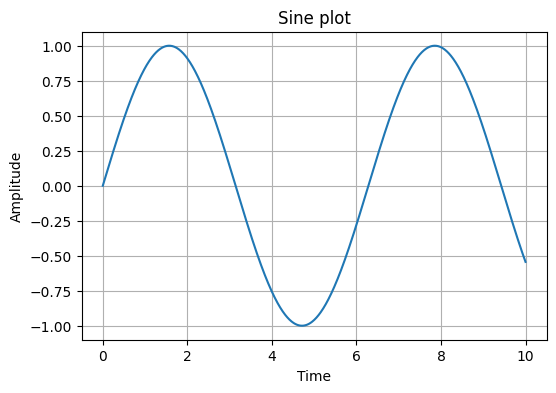

In [56]:
# Generate 1000 numbers from 0 to 10
x = np.linspace(0, 10, 1000)
y = np.sin(x)

# Size of the plot
plt.figure(figsize=(6, 4))
# Main title
plt.title('Sine plot')
# Title of the x axis
plt.xlabel('Time')
# Title of the y axis
plt.ylabel('Amplitude')
# Show grid lines
plt.grid('on')
# Plot the data
plt.plot(x, y)

### Two plots on top of each other

Text(0, 0.5, 'Amplitude')

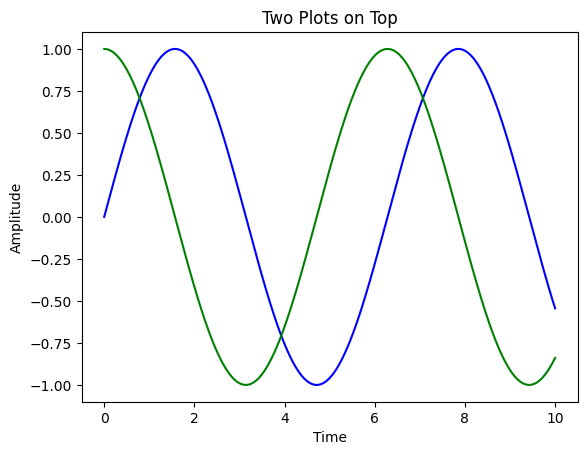

In [57]:
plt.plot(x, y, color='b') # blue
plt.plot(x, np.cos(x), color='g') # green
plt.title('Two Plots on Top')
plt.xlabel('Time')
plt.ylabel('Amplitude')

### Different ploting styles

Text(0, 0.5, 'Amplitude')

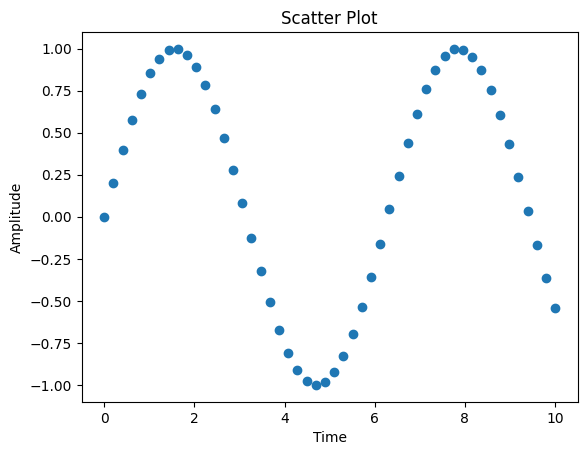

In [58]:
# Generate 50 numbers from 0 to 10
x = np.linspace(0, 10, 50)
y = np.sin(x)

# Plot as dots
plt.scatter(x, y)
plt.title('Scatter Plot')
plt.xlabel('Time')
plt.ylabel('Amplitude')

## Sine wave with frequency
#### Note: In markdown mode, you can write latex equations

$ y =sin(2*\pi*f*t) $

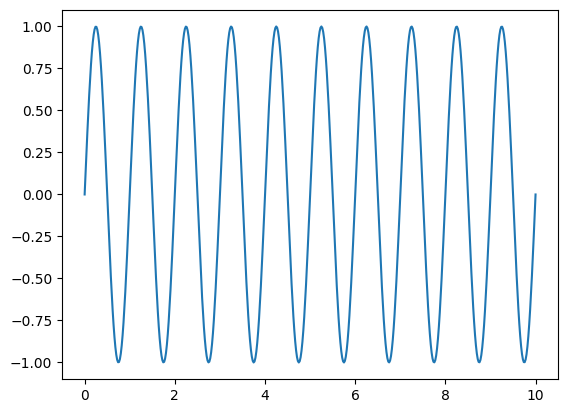

In [59]:
x = np.linspace(0, 10, 500)
frequency = 1

# 2*pi*f*t
y = np.sin(2 * np.pi * frequency * x)

# Completes 9 cycles (remember 10 is not included)
plt.plot(x, y)

### Change Figure Size

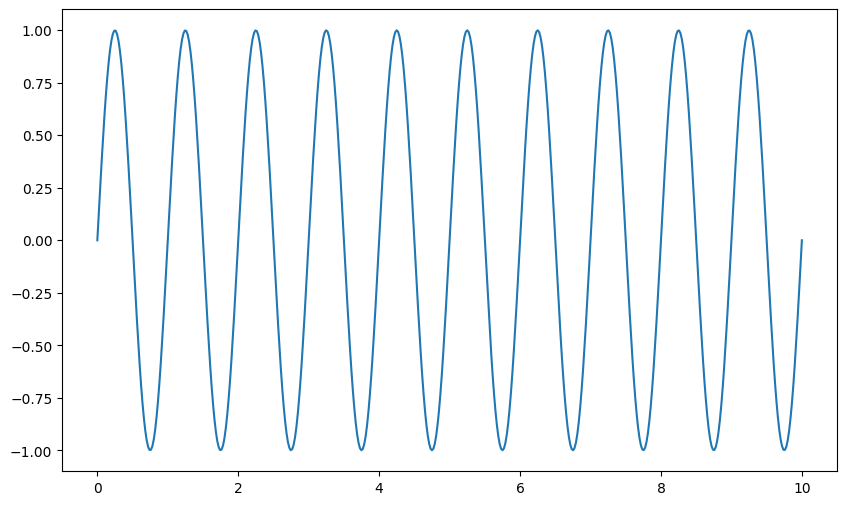

In [60]:
# (plot size of x, plot size of y)
# NOTE: call figure() before calling plot()
plt.figure(figsize=(10, 6))
plt.plot(x, y)

## Plotting with pandas

In [61]:
df = pd.read_csv('winequality-red.csv', delimiter=';')
list(df.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

<Axes: >

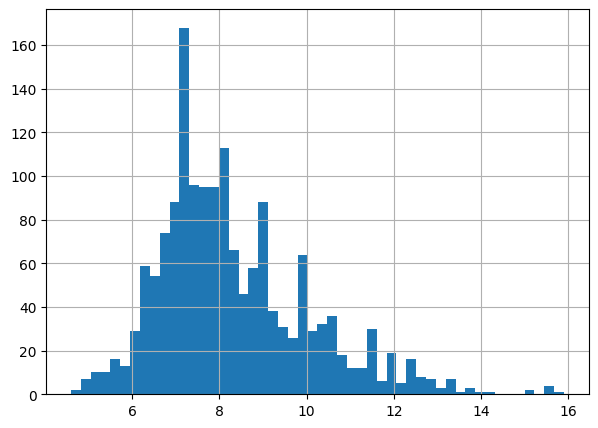

In [62]:
df['fixed acidity'].hist(figsize=(7, 5), bins=50)

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

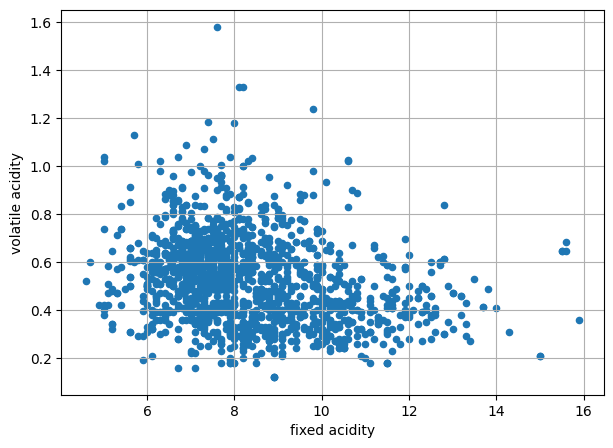

In [63]:
# Note that xlabel and ylabel is automatic
df.plot.scatter(x='fixed acidity', y='volatile acidity', figsize=(7, 5), grid='on')

#### The same above with matplotlib

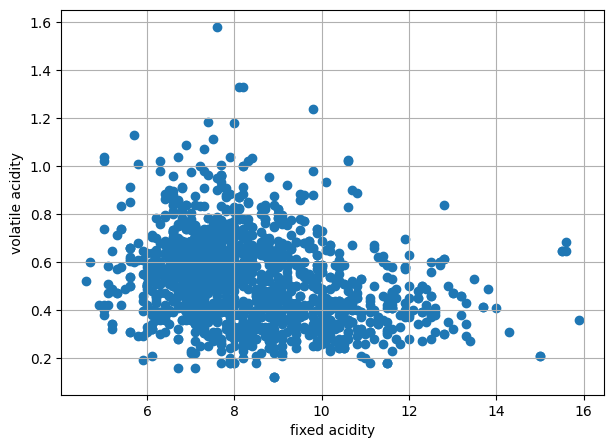

In [64]:
plt.figure(figsize=(7, 5))
# select x, y from columns from df
plt.scatter(df['fixed acidity'], df['volatile acidity'])
plt.xlabel('fixed acidity')
plt.ylabel('volatile acidity')
plt.grid('on')